In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_probability as tfp
from matplotlib.pyplot import figure
tfd = tfp.distributions

## DATAS

In [2]:
def normal_distribution(value, mu = 0, sigma = 1):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (value - mu)**2 / (2 * sigma**2) )

def modify_x(x, k, a, l, b):
    return (k*x+a)/(l*x+b+0.0001)

def inv_modify_x(x, k, a, l, b):
    return (b*x-a)/(-l*x+k-0.0001)

In [10]:
nbr_values = 101

mu_output = 0.5
sigma_output = 0.3

mu_noise = 0.01
sigma_noise = 0.05

nbr_iter = 1500
x_data=list()
x_adapted=list()
y_data=list()
y_observation=list()
for i in range(nbr_iter):
    new_x_data = inv_modify_x(np.linspace(0, 1, num=nbr_values), 0.2, -0.1, -3, 0.1)
    new_x_adapted = modify_x(new_x_data, 0.2, -0.1, -3, 0.1)
    
    
#     new_x_data = modify_x(np.linspace(0, 1, num=nbr_values), 1, 0.1, 3, 0.2)
#     new_x_adapted = inv_modify_x(new_x_data, 1, 0.1, 3, 0.2)
    
    
    new_y_data = normal_distribution(new_x_adapted, mu_output, sigma_output)
    new_y_observation= new_y_data + np.random.normal(mu_noise, sigma_noise, nbr_values)
    
    x_data.append(list(new_x_data))
    x_adapted.append(list(new_x_adapted))
    y_data.append(list(new_y_data))
    y_observation.append(list(new_y_observation))
    
x_data=np.array(x_data)
x_adapted=np.array(x_adapted)
y_data=np.array(y_data)
y_observation=np.array(y_observation)

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


path = '/Users/louis/Desktop/Tsinghua/Machine Learning/1_Project/DataSet/'
state = 'Full_Data'
full_path = path+state+'.csv'
data_set = pd.read_csv(full_path)
criteria = "Occurence"

# OR → criteria = "Percent"

# REM : f(a|b, c) means f(a) knowing b and c (e.g. with b and c fixed)

# INPUT : State & Name
# OUTPUT : Occurence = f(Year|State, Name)
def get_year(state, name, data_set_= data_set):
    return data_set_[data_set_["State"]==state][data_set_["Name"]==name]

# INPUT : Name
# OUTPUT : for each State : Occurence = f(year|State, Name)
def get_year_list(name, data_set_= data_set):
    return data_set_[data_set_["Name"]==name].pivot_table(index=["Year"],columns='State',values="Occurence")

# INPUT : Name
# OUTPUT : On average for the USA : Occurence = f(year|Name)
def get_year_USA(name, data_set_=data_set):
    if criteria=="Percent" : print("/!\ get_year_USA USES OCCURENCE, NOT PERCENT /!\ ")
    return data_set_[data_set_["Name"]==name].pivot_table(index=["Year"],columns='State',values="Occurence").sum(axis=1)

    
# INPUT : Year & Name
# OUTPUT : Occurence = f(State|Year, Name)    
def get_state(year, name, data_set_= data_set):
    return data_set_[data_set_["Year"]==year][data_set_["Name"]==name]

# INPUT : Year & State
# OUTPUT : Occurence = f(Name|Year, State)
def get_name(year, state, data_set_= data_set):
    return data_set_[data_set_["Year"]==year][data_set_["State"]==state]


# OUTPUT : List of every states in the data set
def get_list_states(data_set_ = data_set):
    return data_set["State"].drop_duplicates()


# INPUT (optional) unique = False => ith name is the most popular in the (1910+i)th year
#       (optional) period = [a,b] => only select the popular names from this period
# OUTPUT : For every year of the period, returns the most popular among the states with the number of occurences
# FORMAT : LIST
def get_list_most_used_names_year(unique = True, data_set_ = data_set):
    temp_val = data_set_.pivot_table(index="Year", columns=["Name","State"],values="Occurence").idxmax(axis=1).values
    name_list = [name for (name, state) in temp_val]
    if not unique:
        return name_list
    return [name_list[i] for i in sorted(np.unique(name_list, return_index=True)[1])]

##################################################

# >> NOT THE MOST USEFULL FUNCTIONS BELOW << 

# INPUT (optional) length = n => get the top n names. 
#       (optional) period = [a,b] => only select the popular names from this period
# OUTPUT : the most popular names among the states with the number of occurences and within the period
# FORMAT : pd.series (pandas.core.series.Series)
def get_most_used_names(length_=-1, period=(1910,2016), data_set_ = data_set):
    if criteria=="Percent" : print("/!\ get_most_used_names USES OCCURENCE, NOT PERCENT /!\ ")
    return data_set_[data_set_["Year"].isin([i for i in range(period[0],period[1]+1)])].pivot_table(index=["Year", "State"],columns='Name',values="Occurence").sum().sort_values(ascending=False)[0:length_]

# SAME AS "get_most_used_names()" but RETURNS a LIST with only the names
# FORMAT : LIST
def get_list_most_used_names(length_=-1, period=(1910,2016), data_set_ = data_set):
    return list(get_most_used_names(length_, period, data_set_).index)



<>:30: DeprecationWarning: invalid escape sequence \ 
<>:70: DeprecationWarning: invalid escape sequence \ 
<>:30: DeprecationWarning: invalid escape sequence \ 
<>:70: DeprecationWarning: invalid escape sequence \ 
<>:30: DeprecationWarning: invalid escape sequence \ 
<>:70: DeprecationWarning: invalid escape sequence \ 
<ipython-input-4-056f00f46194>:30: DeprecationWarning: invalid escape sequence \ 
  if criteria=="Percent" : print("/!\ get_year_USA USES OCCURENCE, NOT PERCENT /!\ ")
<ipython-input-4-056f00f46194>:70: DeprecationWarning: invalid escape sequence \ 
  if criteria=="Percent" : print("/!\ get_most_used_names USES OCCURENCE, NOT PERCENT /!\ ")


In [5]:
Jennifer_CA = get_year("CA","Jennifer").pivot_table(index="Year")["Occurence"].reindex(range(1910,2017)).fillna(0)
from sklearn.preprocessing import normalize

y_observation = normalize(np.array([Jennifer_CA.values for i in range(nbr_iter)]))
x_data = normalize(np.array([Jennifer_CA.index for i in range(nbr_iter)]))
nbr_values = len(Jennifer_CA.index)

C:\Users\louis\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


### On essaie de prédire ça :

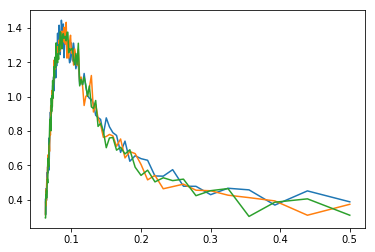

In [11]:
%matplotlib inline
plt.plot(x_data[0], y_observation[1])
plt.plot(x_data[0], y_observation[0])
plt.plot(x_data[0], y_observation[2])

## TENSORFLOW

#### Graph Definition

In [12]:



#Paramater(s)
lr = 0.01

#Placeholders
x = tf.placeholder(tf.float32, [nbr_values], name="x_placeholder")
y = tf.placeholder(tf.float32, [nbr_values], name="y_placeholder")


k = tf.constant(1., name="k")
a = tf.constant(0., name="a")
l = tf.constant(0., name="l")
b = tf.constant(1., name="b")

norm = tf.Variable(1., name="norm")

mu_tf = tf.Variable(1910., name="mu")
sigma_tf = tf.Variable(14., name="sigma")

# norm = tf.Variable(1., name="norm")

# x_modified = tf.math.divide(tf.math.add(tf.math.multiply(k, x), a), 
#                             tf.math.add(tf.math.multiply(l, x), b))
# x_modified = tf.math.divide(tf.math.add(x,a), k)
# x_modified = (k*x + a)/(l*x +b)

#Prediction
# mu_tf = tf.Variable(1910., name="mu")
# sigma_tf = tf.Variable(50., name="sigma")




normal_distrib = tfd.Normal(loc=mu_tf, scale=sigma_tf)

pred = tf.math.multiply(normal_distrib.prob(x), norm)


#Cost and training
cost = tf.losses.mean_squared_error(predictions=pred, labels=y)
train_op = tf.train.AdamOptimizer(lr).minimize(cost)

#### Session

<IPython.core.display.Javascript object>


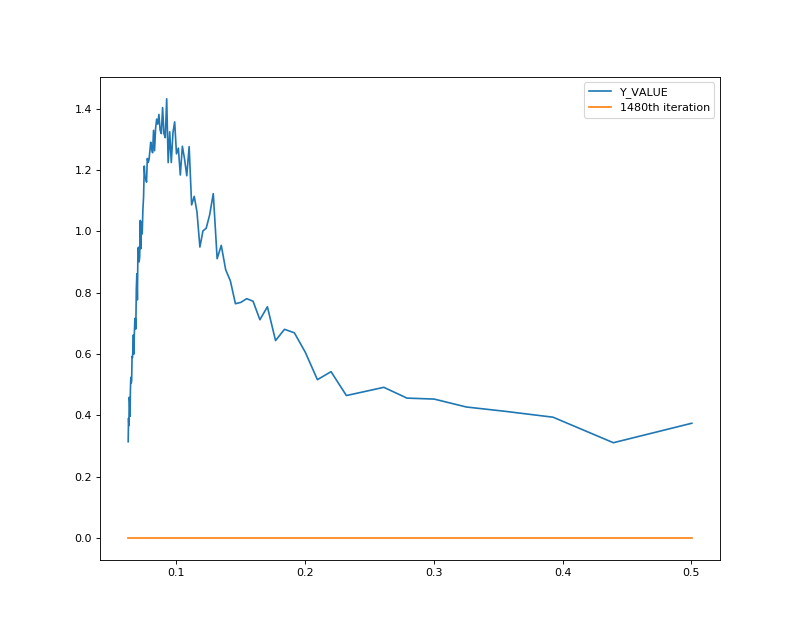

0.9418067


In [13]:
with tf.Session() as sess:
    init = tf.global_variables_initializer()
    sess.run(init)
    
    %matplotlib notebook
    
    
    fig = plt.figure(figsize=(10, 8), dpi= 80, facecolor='w', edgecolor='k')
    ax = fig.add_subplot(111)
    plt.ion()
    fig.show()
    fig.canvas.draw()


    
    mu_values = list()
    sigma_values = list()
    cost_values = list()
    for i in range(nbr_iter):
        batch_xs = x_data[i].reshape([nbr_values]).astype(np.float32)
        batch_ys = y_observation[i].reshape([nbr_values]).astype(np.float32)
        
        sess.run(train_op, feed_dict={
            x: batch_xs,
            y: batch_ys
        })
        
        i_iter = sess.run(pred, feed_dict={
            x: batch_xs,
            y: batch_ys
        })
#         x_mod = sess.run(x_modified, feed_dict={
#             x: batch_xs,
#             y: batch_ys
#         })
#         if(i==0):
#             print(sess.run(x_modified,feed_dict={
#                 x: batch_xs,
#                 y: batch_ys
#             }))
        # Update the graph
        if (i%20==0):           
            ax.clear()
            ax.plot(x_data[0], y_observation[0], label="Y_VALUE")
            ax.plot(x_data[0], i_iter, label=str(i)+"th iteration")
            plt.legend()
            fig.canvas.draw()

       
        mu_values.append(sess.run(mu_tf, feed_dict={
            x: batch_xs,
            y: batch_ys
        }))
        sigma_values.append(sess.run(sigma_tf, feed_dict={
            x: batch_xs,
            y: batch_ys
        }))
        
        cost_values.append(sess.run(cost, feed_dict={
            x: batch_xs,
            y: batch_ys
        }))
    print(sess.run(cost,feed_dict={
        x: batch_xs,
        y: batch_ys
    }))
    plt.legend()

In [ ]:
%matplotlib inline
plt.plot(mu_values)

In [ ]:
plt.plot(sigma_values)

In [ ]:
plt.plot(cost_values)

In [ ]:
cost_values[1000]

In [326]:
cost_values[1]

0.009345793